In [3]:
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import Image
from IPython.display import HTML,YouTubeVideo
from pylayers.gis.layout import *
from pylayers.simul.radionode import *
from pylayers.simul.link import *
from pylayers.antprop.antenna import * 
from pylayers.measures.mesuwb import *

<center>
<h1 class="title">PyLayers</h1>
<h2 class="title"><font color="#2201FF">An Indoor Propagation Tool for Studying Localization in WBAN Context</font></h2>
<h2 class="title"> IC1004 COST Meeting Aalborg 2014</h2>
<h2> Nicolas Amiot, Meriem Mhedhbi,Stéphane Avrillon</h2>
<h2><u>Bernard Uguen</u> </h2>
<h3> Presentation available @ http://tinyurl.com/nlprrkj</h3>
</center>

<div>
<img class="logo" src="./files/images/logo.png" height=100 width=800>

</div>

<h1 class="title">Outline</h1>

* What is PyLayers ? 
* Indoor Radio Propagation Modeling
* Handling mobility for WBAN
    * Large scale 
    * Body scale
* Perspectives     


<h1 class="title">What is PyLayers ? </h1>

* An **Open Source** platform for <font color=blue>**education and research**</font>
* Writen in **Python**
* **Evolutive** 
    + git versioned
    + documented from the source code
    + tested (not enough probably...)

* **Modular** 
    - specialized modules
    - [gis,antprop,simul,signal,mobility,util,...]
   
* **Interactive**
    + IPython notebook
    
* **Object Oriented**
    + help(), show() and `__repr__`
    
* **Data Oriented**
    + Using Hierarchical data storage (*HDF5*)

<h1 class="title">Features and Applications</h1>

* Production of radio observables for **localization in Indoor environments** 

* Analysis of channel measurements

* Fast Indoor coverage using Motley Keenan model

* Various radio standards including **UWB** radio (to be extended)

* Combining propagation modeling and **human mobility** (Indoor pedestrian D2D)


<h1 class="title"> Indoor Layout Description</h1>


In [4]:
L=Layout('WHERE1.ini')

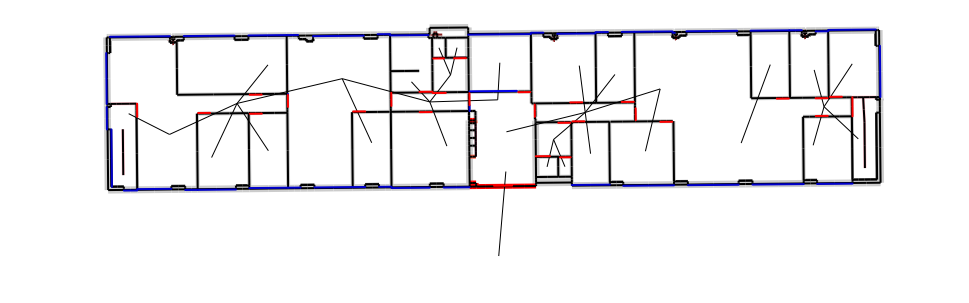

In [5]:
f = figure(figsize=(20,5))
f,a = L.showG('s',fig=f,airwalls=False,slab=True,subseg=True)
f,a = L.showG('r',nodes=True,node_size=80,node_color='c',edge_color='k',width=1,fig=f)
#t = plt.title('Layout with graph of Rooms',fontsize=30)
savefig('./files/WHERE1Layout.png')

KeyError: 395

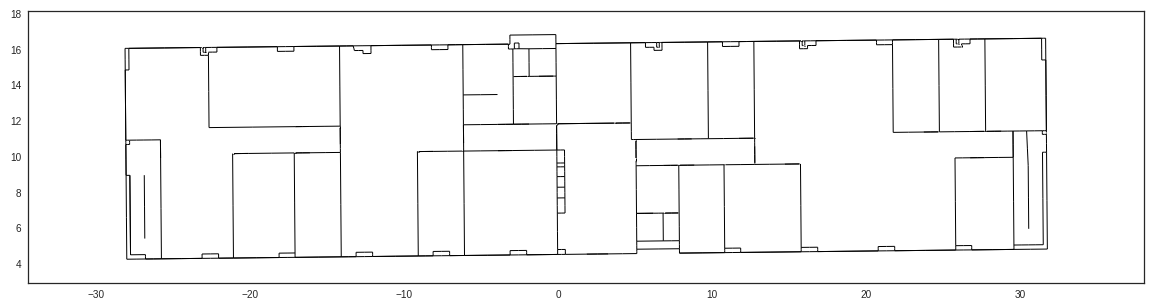

In [8]:
f = figure(figsize=(20,5))
plt.axis('off')
f,a = L.showG('sv',nodes=False,node_size=80,node_color='c',edge_color='k',width=1,fig=f)
#t =plt.title('Graph of Visibility',fontsize=30)
savefig('./files/WHERE1Vis.png')

<center>
<div>
<img src="./files/WHERE1Layout.png" height=750 width=750/>
<h3>Office building with Graph of rooms</h3>
</div>
</center>

<center>
<div>
<img src="./files/WHERE1Vis.png" height=750 width=750/>
<h3> Indoor Layout with precalculated visibility graph </h3>
</div>
</center>

<h1 class="title"> Link Simulation </h1>

+ `Radionode`
    * coordinates
    * 3D orientation matrix $3 \\times 3
    * 1 antenna object 
+ `Link`
    * 2 `RadioNodes`
    * 1 `Layout`
  

<h1 class="title"> From the Layout to the IR-UWB Channel Impulse Response</h1>

In [9]:
rx = RadioNode(_fileini='w2m1rx.ini',_fileant='defant.vsh3')
tx = RadioNode(_fileini='w2m1tx.ini',_fileant='defant.vsh3')

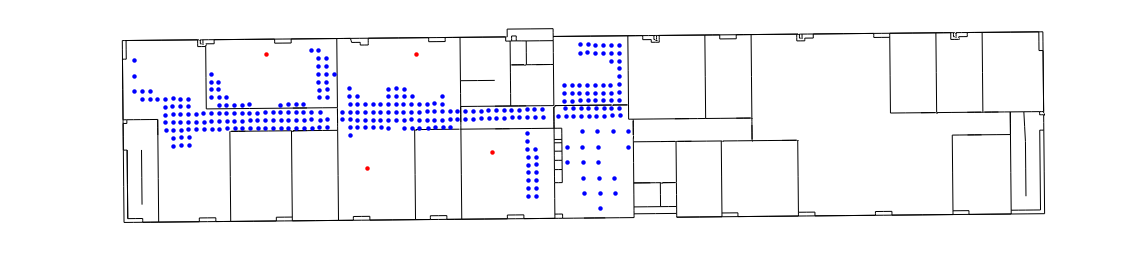

In [10]:
f = figure(figsize=(20,5))
f,a=L.showG('s',fig=f)
p = plt.scatter(rx.position[0,:],rx.position[1,:],s=20,c='b')
p = plt.scatter(tx.position[0,:],tx.position[1,:],s=20,c='r')
savefig('./files/W1M1points.png')

<center>
<div>
<img src="./files/W1M1points.png" height=750 width=2050/>
<h3>W1 M1 Dataset. IR-UWB CEA Leti Testbed - 4 Rx (in Red)- 275 Tx (in Blue)- [WHERE1D4.1]</h3>
</div>
</center>

<h1 class="title"> WHERE1 M1 IR-UWB extraction </h1>

In [11]:
# measure id
tx_id = 90 # in M.valid_index
rx_id = 2 # 1,2,3,4
M=UWBMeasure(tx_id)

<h1 class="title"> Link Simulation </h1>

+ Links are saved in `hdf5` format
+ All Links data members are evaluated once and stored

+ `In [1]: Lk = DLink(L=L,a=tx.points[2],b=rx.points[24],cutoff=3)`
+ `In [2]: Lk.eval()`

In [18]:
L=Layout('WHERE1.ini')

In [19]:
L.sl

List of Slabs
-----------------------------

WINDOW_GLASS : GLASS | [0.05]
       blue2 1
DOOR : WOOD | [0.05]
       red1 1
PLASTERBOARD_7CM : PLASTER | [0.05]
       pink 3
_AIR : AIR | [0.05]
       white 1
WALL : BRICK | [0.05]
       grey20 3
PILLAR : REINFORCED_CONCRETE | [0.05]
       brown4 10
PARTITION : PLASTER | [0.05]
       grey80 4
CONCRETE_20CM3D : CONCRETE | [0.05]
       grey80 7
AIR : AIR | [0.05]
       white 1
PLASTERBOARD_10CM : PLASTER | [0.05]
       tomato 4
WOOD : WOOD | [0.05]
       maroon 2
PLASTERBOARD_14CM : PLASTER | [0.05]
       red 5
FLOOR : REINFORCED_CONCRETE | [0.05]
       grey40 1
CEIL : REINFORCED_CONCRETE | [0.05]
       grey20 1
CONCRETE_7CM3D : CONCRETE | [0.05]
       grey60 3
3D_WINDOW_GLASS : GLASS | AIR | GLASS | [0.05, 0.05, 0.05]
       blue3 1


In [1]:
#Lk = DLink(L=L,a=tx.points[1],b=rx.points[54],cutoff=5,verbose=False)
#Lk = DLink(L=L,a=tx.points[2],b=rx.points[114],cutoff=5,verbose=False)
Lk = DLink(L=L,a=tx.points[2],b=rx.points[24],cutoff=5,verbose=False)
Lk.eval()
f,a = Lk.show(labels=False,figsize=(20,5))
savefig('./files/linkAB.png')

NameError: name 'DLink' is not defined

<center>
<div>
<img src="./files/linkAB.png" height=750 width=2050/>
<h3>Defining a Radio Link between 2 cycles </h3>
</div>
</center>

<h2> The Ray **Signature** `.Si` </h2>

Signature is somehow related to the  concept of **common clusters** or **ray persistency** 

In [21]:
Lk.Si.keys()
k = 4 
print "Number of Signatures : ",Lk.Si[4].shape[0]/2
print "signature (interaction entities index) :",Lk.Si[k][0,:]
print "signature (interaction type) :",Lk.Si[k][1,:]

Number of Signatures :  42
signature (interaction entities index) : [328  30 135 377]
signature (interaction type) : [3 3 3 3]


+ Signatures are rays potentialities
+ A set of Signatures is calculated from one Layout cycle to an other Layout cycle 
+ A Signature consists of 2 lists
    + A list of interaction entities (point (<0) or segment (>0))
    + A list of type of interaction (1:D, 2:R, 3:T)
+ A **same signature** is used for calculation of rays from one cycle to an other cycle

<h1 class="title">3D Rays (ceil and floor miroring)</h1>

In [22]:
Lk.R

problem


Rays3D
----------
2 / 1 : [0]
3 / 8 : [1 2 3 4 5 6 7 8]
4 / 27 : [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]
5 / 38 : [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
6 / 26 : [74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99]
-----


+ Rays are grouped by blocks of same number of interactions
+ Each block of rays is evaluated as a whole for all interactions (R,T) as a whole 

In [2]:
c = plt.cm.jet
col = c(1.0)
f,a = Lk.R.show(L=Lk.L,figsize=(20,5),i=1,r=0,alpharay=0.3,widthray=5,colray=col)
savefig('./files/W1LOS.png')

NameError: name 'plt' is not defined

<center>
<div>
<img src="./files/W1LOS.png" height=100 width=2000/>
<h3>Lk.R.show(L=Lk,i=3,r=0)</h3>
</div>
</center>


(<matplotlib.figure.Figure at 0x7efcaa5c5410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efca30947d0>)

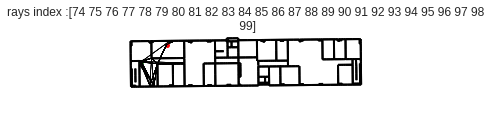

In [28]:
Lk.R.show(L=Lk.L)

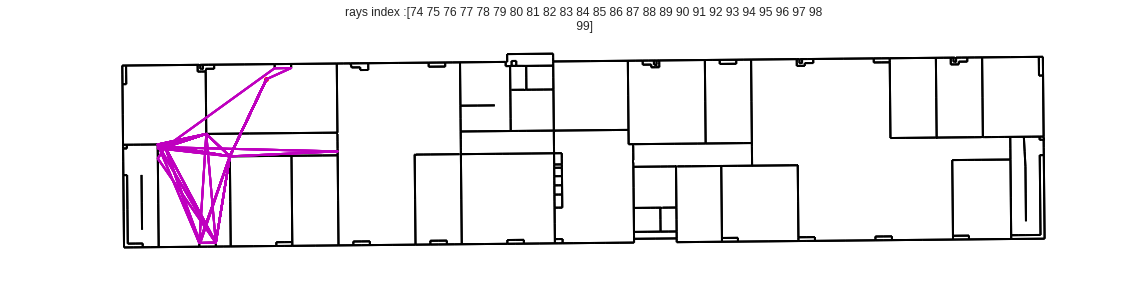

In [27]:
f,a = Lk.R.show(L=Lk.L,figsize=(20,5),i=4,widthray=2,colray='m')


<h3 class=title>All group of rays (from 3 to 9 interactions) <h3>


In [ ]:
f,a=Lk.show(rays=True,col='cmap',pol='tot',figsize=(20,5),dB=True,cmap=cm.hot,dyn=50,labels=False)
savefig('./files/M1rays50.png')
f,a=Lk.show(rays=True,col='cmap',pol='tot',figsize=(20,5),dB=True,cmap=cm.hot,dyn=120,labels=False)
savefig('./files/M1rays120.png')

<center>
<div>
<img src="./files/M1rays50.png" height=750 width=2050/>
<h3> Dynamic 50dB</h3>
<img src="./files/M1rays120.png" height=750 width=2050/>
<h3> Dynamic 120dB</h3>
</div>
</center>


<h3 class=title>Vertical and Horizontal Polarization (Dynamic 60 dB) <h3>

In [ ]:
f,a=Lk.show(rays=True,col='cmap',pol='tt',dB=True,cmap=cm.hot,dyn=60,labels=False)
f,a=Lk.show(rays=True,col='cmap',pol='pp',dB=True,cmap=cm.hot,dyn=60,labels=False)


<h3 class=title>Co & Cross Polarization (Dynamic 60dB) <h3>

In [ ]:
f,a=Lk.show(rays=True,col='cmap',pol='co',dB=True,cmap=cm.hot,dyn=60)
f,a=Lk.show(rays=True,col='cmap',pol='cross',dB=True,cmap=cm.hot,dyn=60)

<h1> The Propagation Channel `.C` : class `Ctilde`</h1>

+ Full polarization 
+ UWB 
+ Full angular information

$$\mathbf{\tilde{C}(f)} = \left[\matrix { C_{\theta,\theta} & C_{\theta,\phi}\\C_{\phi,\theta} & C_{\phi,\phi}}\right]$$


<h1 class=title> Tensor notation and vectorized implementation <h1>


+ underlying variable of each axes have to be "visible" in code and algebra
+ Exploiting variable **broadcasting**

$$
  ^{ba}\mathbf{H}_{f} =\  ^{ba}\boldsymbol\gamma_{f}\ ^{ba}\boldsymbol\alpha_{f}^{\underline{r}} exp(-2j \pi \mathbf{f}_{f} \boldsymbol\tau_{\star}^{\underline{r}})
$$

$$ ^{ba}\boldsymbol\gamma_{f}  =\ ^{ab}\boldsymbol\gamma_{f} $$
$$ ^{ba}\boldsymbol\alpha_{f,r} =\ ^{ab}\boldsymbol\alpha_{f,r}$$

$$  ^{ba}\boldsymbol\alpha_{f,r} =\ ^{a}\mathbf{F}_{f,r}^{\underline{p},1}\ ( ^{ba \ell}\mathbf{\tilde{C}}_{f,r,}^{p,\underline{q}}\  ^{b}\mathbf{F}_{f,r}^{\underline{p}} )_{f,r}^{\underline{p},1} $$
    
$$ ^{ab}\boldsymbol\alpha_{f,r} =\ ^{b}\mathbf{F}_{f,r}^{\underline{p},1}\ ( ^{ab \ell}\mathbf{\tilde{C}}_{f,r,}^{\underline{p},q}\  ^{a}\mathbf{F}_{f,r}^{\underline{p}} )_{f,r}^{\underline{q},1}
$$

+ As we have the following property :  

$$ ^{ba}\mathbf{\tilde{C}}_{f,r,p,q} = ^{ab}\mathbf{\tilde{C}}_{f,r,q,p}$$

Which is also True for local propagation channel expressed in antenna local basis
$$ ^{ba \ell}\mathbf{\tilde{C}}_{f,r,p,q} = ^{ab \ell}\mathbf{\tilde{C}}_{f,r,q,p}
$$

This proves channel reciprocity

$$
    ^{ba}\mathbf{H}_{f,r,p,q} = ^{ab}\mathbf{H}_{f,r,p,q}
$$

+ Channel reciprocity is checked and asserted in the code

In [ ]:
Lk.C.sort('energy')
fig= figure(figsize=(10,10))
#f,a= Lk.C.show(cmap='jet',fontsize=40,typ='l20',vmin=-120,vmax=-30)
f,a= Lk.C.show(cmap='jet',typ='l20',vmin=-120,vmax=-30,fig=fig)
savefig('./files/CtildeEnergy.png')

In [ ]:
Lk.C.sort('tauk')
fig= figure(figsize=(10,10))
f,a=Lk.C.show(cmap='jet',typ='l20',vmax=-30,vmin=-120,fig=fig)
savefig('./files/CtildeDelay.png')

In [ ]:
Lk.C.sort('tauk')
fig= figure(figsize=(10,10))
f,a=Lk.C.show(cmap='jet',typ='r',fig=fig)
savefig('CtildePhase.png')

In [ ]:
fig = figure(figsize=(25,10))
f,la=Lk.C.doadod(fig=fig,cmap=cm.jet,fontsize=20,s=100,polar=True,colorbar=True,xa=Lk.a[0],xb=Lk.b[0])
savefig('./files/CtildeDOADOD.png')

<h1> The Propagation Channel `.C`</h1>

In [ ]:
Lk.C

<center>
<div>
<img src="./files/CtildeDelay.png" height=400 width=400/>
<h3>60 rays, 181 frequency points</h3>
</div>
</center>

<h1> The Propagation Channel `.C` (Angular Information)</h1>

<center>
<div>
<img src="./files/CtildeDOADOD.png" height=800 width=800/>
<h3>60 rays, 180 frequency points</h3>
</div>
</center>

<h1> Antennas `.Aa` `.Ab`</h1>

In [ ]:
Lk.Aa=Antenna('defant.vsh3',source='cst')
Lk.Ab=Antenna('defant.vsh3',source='cst')

+ Antenna are compressed either in 
    - **Scalar Spherical Harmonics** (.sh3)
    - **Vector spherical harmonics** (.vsh3)

In [ ]:
Lk.Aa

In [ ]:
Lk.Aa.Fsynth()

<center>
<div>
<img src="./files/coeff_lm.png" height=800 width=800/>
<h3>Evolution of Spherical Harmonics Coeff w.r.t cylinder phantom (radius=10cm) distance  [Mhed14] </h3>
</div>
</center>

In [ ]:
Lk.Aa.C.show('s3')

In [ ]:
Lk.Aa.polar(phd=90,fGHz=[3,5,7],dyn=5)
savefig('./files/AntCEA357simul.png')

$$G_{dBi}=20\log_{10}(|E_{\theta}|\sqrt{\frac{4\pi}{\eta_0}}) = 20\log_{10}(|E_{\theta}|\sqrt{\frac{1}{30}})$$

In [ ]:
from IPython.display import Image
Image('./files/UWB-CEA.png')

<center>
<div>
<img src="./files/UWB-CEA.png" height=500 width=500/>
<h3> From Deliverable D1.2 WHERE1 - Campaign M1 </h3> 
<img src="./files/AntCEA357simul.png" height=400 width=400/>
<h3>Lk.Aa.polar(phd=90,fGHz=[3,5,7],dyn=5)</h3>
</div>
</center>


In [ ]:
Lk.H

In [ ]:
from pylayers.signal.waveform import *

In [ ]:
wav=Waveform(typ='W1compensate')

In [ ]:
from IPython.display import Image
Image('WaveformCEA.png')

In [ ]:
Image('UWB-CEA-freq.png')

In [ ]:
wav.show()

<h1> The transmission channel `.H` (class `Tchannel`) </h1>

In [ ]:
r=Lk.H.applywavB(wav.sfg)

In [ ]:
r.plot(typ='v')

<h1 class="title">Handling human mobility</h1>

+ Human mobility is handled with a Discrete Event Simulator based on SimPy

In [ ]:
YouTubeVideo('vNwzZVoE4mI')

<center>
<div>
<img  src="./files/snapshot5.png" height="500" width="500"/>
</div>
<h3>Positions of the body equipped with radio devices along a synthetic trajectory</h3>
</center>

<h1 class="title">Comparison with measurements</h1>

<h1 class="bigtitle">Conclusion - On Going Work</h1>

+ PyLayers is still in an early stage 

+ Aims to become a versatile platform for Indoor and Outdoor in WBAN context 

+ **Ongoing Work**
    + Layout edition plugin in [josm](http://josm.openstreetmap.de/)
    + Diffraction is not fully implemented yet (Ongoing)
    + Producing Physical Layer abstraction for [various standard](https://github.com/pylayers/pylayers/blob/master/data/ini/wstd.json) (BER,PER) 
    + Improving post processing of multi link WBAN channel (See Analysis of NICTA)
        + A CORMORAN Scenario measurement campaign to be held on June 2014

+ **Future work**        
    + Outdoor and Indoor/Outdoor Small Cells
    + Implementing reverberation with propagation graphs [Pedersen2014]    

+ If you have some interest in PyLayers [fork](https://github.com/pylayers/pylayers/fork) the whole project on github
+ Feedback is more than welcome

<h1 class="title">References</h1>


**[Mhed14]** Meriem Mhedhbi, Stéphane Avrillon, Troels Pedersen, and Bernard Uguen.
[*Modelling of UWB antenna perturbed by human phantom in spherical harmonics space*](http://vbn.aau.dk/files/195257751/1569855541.pdf). In The 8th European
Conference on Antennas and Propagation (EuCAP 2014) (EuCAP 2014), The Hague, The
Netherlands, April 2014

**[MotionCapture]** [Cmu graphics lab motion capture database : Subject 7: walk (0701.c3d).]( http://mocap.cs.
cmu.edu/search.php?subjectnumber=%&motion=%)


In [ ]:
from IPython.display import display, HTML
s = """

<style>

.rendered_html {
    font-family: "proxima-nova", helvetica;
    font-size: 150%;
    line-height: 1.3;
}

.rendered_html h1 {
    margin: 0.25em 0em 0.5em;
    color: #015C9C;
    text-align: center;
    line-height: 1.2; 
    page-break-before: always;
}

.rendered_html h2 {
    margin: 1.1em 0em 0.5em;
    color: #26465D;
    line-height: 1.2;
}

.rendered_html h3 {
    margin: 1.1em 0em 0.5em;
    color: #002845;
    line-height: 1.2;
}

.rendered_html li {
    line-height: 1.5; 
}

.prompt {
    font-size: 120%; 
}

.CodeMirror-lines {
    font-size: 120%; 
}

.output_area {
    font-size: 120%; 
}

notebook {
    background-image: url('files/images/background.png');
}

h1.bigtitle {
    margin: 4cm 1cm 4cm 1cm;
    font-size: 300%;
}

h3.point {
    font-size: 200%;
    text-align: center;
    margin: 2em 0em 2em 0em;
    #26465D
}

.logo {
    margin: 20px 0 20px 0;
}

a.anchor-link {
    display: none;
}

h1.title { 
    font-size: 250%;
}

</style>
"""
display(HTML(s))

In [ ]:
HTML('<iframe src=http://www.pylayers.org width=1000 height=350></iframe>')